In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## GA-DAT30 HW1
1. What do you notice about the data? Any issues?
    - Answer: 
    a.There seem to be some cases in which ore than one passenger is registered, e.g.: Futrelle, Mrs. Jacques Heath (Lily May Peel), is that a second passenger? A servant of travelling with and not registered by themselves?.
    b. Cabin entries are not consistent, some came into pandas as NaN and some came in as strings.
    c. some of the ages are hard to interpret because they are not integers
    
2. What is the overall survival rate?
    - Answer: 40.4494382%
    
3. What role does gender play in surviving?
    - Answer: More than twice as many survivors were women over men, 67.71% of survivors were women and 32.29% were men 
    
4. What role does class play in surviving?
    - Answer: More first class passengers survived than the other two classes, 2 and 3. 41.66% of First class survived, 28.82% of second class survived and 29.52% of third class survived.
    
5. What role does age play in surviving?
    - Answer: a very large part of the survivors were between 17 and 40 years old, only very few older passengers survived.
    
6. Given the above, do you have any guesses on what predicts survival?
    - Answer: You have a better chance fo surviving if you were not on the Titanic, 100% of people not on the Titanic survived. Also, if you were on the boat and you were a woman between 13 and 38, traveling in first class, you had a very good chance of surviving.
    
7. Do you have any ideas for new features we could create from the data that would help us predict if someone will survive?
    - Answer: I think it woudl be interesting to know if the cabin you were booked in, in other words your physical location o nthe ship, had a role in survival.

In [2]:
titanic_data = pd.read_csv('titanic_dropna.csv')

In [50]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
6,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
7,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
8,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C
9,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7000,G6,S


In [40]:
survived_group = titanic_data.groupby('Survived')

In [43]:
survived_group.describe()

Age        Fare       Parch  PassengerId      Pclass  \
Survived                                                                      
0        count  424.000000  424.000000  424.000000   424.000000  424.000000   
         mean    30.626179   22.965456    0.365566   442.299528    2.485849   
         std     14.172110   31.448825    0.878341   264.739548    0.743633   
         min      1.000000    0.000000    0.000000     1.000000    1.000000   
         25%     21.000000    7.895800    0.000000   200.750000    2.000000   
         50%     28.000000   11.887500    0.000000   436.000000    3.000000   
         75%     39.000000   26.550000    0.000000   683.250000    3.000000   
         max     74.000000  263.000000    6.000000   891.000000    3.000000   
1        count  288.000000  288.000000  288.000000   288.000000  288.000000   
         mean    28.193299   51.647672    0.531250   457.850694    1.878472   
         std     14.859146   70.664499    0.808747   249.666625    0.836340   
         min      0.420000    0.000000    0.000000     2.000000    1.000000   
         25%     19.000000   13.000000    0.000000   261.500000    1.000000   
         50%     28.000000   26.250000    0.000000   452.000000    2.000000   
         75%     36.000000   65.000000    1.000000   666.500000    3.000000   
         max     80.000000  512.329200    5.000000   890.000000    3.000000   

                     SibSp  
Survived                    
0        count  424.000000  
         mean     0.525943  
         std      1.044760  
         min      0.000000  
         25%      0.000000  
         50%      0.000000  
         75%      1.000000  
         max      5.000000  
1        count  288.000000  
         mean     0.496528  
         std      0.732512  
         min      0.000000  
         25%      0.000000  
         50%      0.000000  
         75%      1.000000  
         max      4.000000

In [44]:
survived_gender = titanic_data[titanic_data['Survived']==1].groupby('Sex')

In [46]:
survived_gender.describe()

Age        Fare       Parch  PassengerId      Pclass  \
Sex                                                                         
female count  195.000000  195.000000  195.000000   195.000000  195.000000   
       mean    28.630769   55.393334    0.594872   445.389744    1.830769   
       std     14.030672   67.508971    0.858538   256.288561    0.791108   
       min      0.750000    7.225000    0.000000     2.000000    1.000000   
       25%     19.000000   13.000000    0.000000   257.000000    1.000000   
       50%     28.000000   26.250000    0.000000   436.000000    2.000000   
       75%     36.000000   77.343750    1.000000   651.000000    2.000000   
       max     63.000000  512.329200    5.000000   888.000000    3.000000   
male   count   93.000000   93.000000   93.000000    93.000000   93.000000   
       mean    27.276022   43.793865    0.397849   483.978495    1.978495   
       std     16.504803   76.649011    0.677909   234.364635    0.920521   
       min      0.420000    0.000000    0.000000    22.000000    1.000000   
       25%     18.000000    9.500000    0.000000   284.000000    1.000000   
       50%     28.000000   26.287500    0.000000   510.000000    2.000000   
       75%     36.000000   52.554200    1.000000   674.000000    3.000000   
       max     80.000000  512.329200    2.000000   890.000000    3.000000   

                   SibSp  Survived  
Sex                                 
female count  195.000000       195  
       mean     0.538462         1  
       std      0.768120         0  
       min      0.000000         1  
       25%      0.000000         1  
       50%      0.000000         1  
       75%      1.000000         1  
       max      4.000000         1  
male   count   93.000000        93  
       mean     0.408602         1  
       std      0.646673         0  
       min      0.000000         1  
       25%      0.000000         1  
       50%      0.000000         1  
       75%      1.000000         1  
       max      4.000000         1

In [28]:
survived_class = titanic_data[titanic_data['Survived']==1].groupby('Pclass')

In [48]:
survived_class['Pclass'].describe()

Pclass       
1       count    120
        mean       1
        std        0
        min        1
        25%        1
        50%        1
        75%        1
        max        1
2       count     83
        mean       2
        std        0
        min        2
        25%        2
        50%        2
        75%        2
        max        2
3       count     85
        mean       3
        std        0
        min        3
        25%        3
        50%        3
        75%        3
        max        3
dtype: float64

In [58]:
survivors_only = titanic_data[titanic_data['Survived'] == 1]

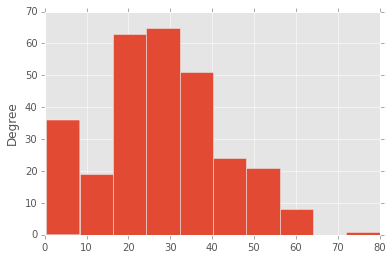

In [86]:
plt.style.use('ggplot')
survived_age = survivors_only.sort('Age')
survived_age['Age'].plot(kind='hist');

In [92]:
survived_age_women = survivors_only[survivors_only['Sex']=='female'].sort('Age')

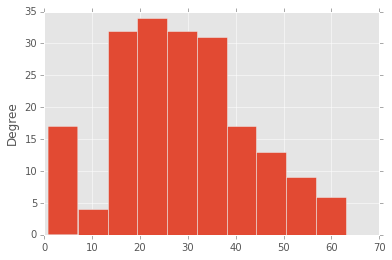

In [96]:
survived_age_women['Age'].plot(kind='hist');